In [1]:
import numpy as np 
import docx2txt
import matplotlib.pyplot as plt
import math
from queue import PriorityQueue
%matplotlib inline

# $Project \, 1B$
### $\text{Implemenation of Huffman Coding and Shannon Coding}$

**By Shinehale(yunsong Yang) (U202115980)**

This programming project is designed for the memento to Steve Jobs, D.A. Huffman and C.
E. Shannon. The objective of this programming assignment is to deeply understand the Huffman coding and Shannon coding method. First of all, let us import the data from the target file as the pretty start of this experiment.


In [2]:
str_data = docx2txt.process('./Steve_Jobs_Speech.docx')
str_data = str_data.lower()
str_data = str_data.replace('\n', '')
print('the length of the English file is: ', len(str_data))

the length of the English file is:  11810


Okay, from the data above, we can have the view that the length of the string is 11810 after we replace the enter with white character. In order to calculate the entropy of the string, we may review the formula as follow:
$$
H(\chi) = - \sum_{i}  P_{i}logP_{i}
$$
By using the powerful formula, we can easily write the code as bellow:

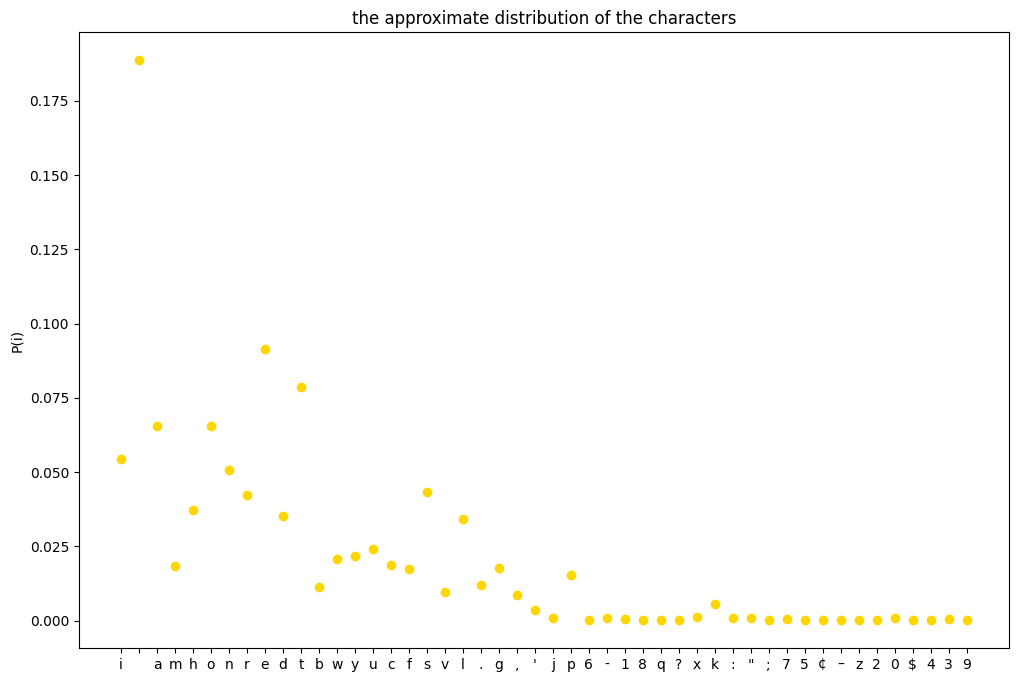

In [3]:
dict_data = dict()
for each in str_data:
    if dict_data.get(each) == None:
        dict_data[each] = 1
    else:
        dict_data[each] += 1
vals_data = np.array(list(dict_data.values()))
keys_data = np.array(list(dict_data.keys()))
tot_chara = np.sum(vals_data)
P_data = vals_data / tot_chara
plt.figure(figsize=(12, 8))
plt.title('the approximate distribution of the characters')
plt.scatter(keys_data, P_data, color='gold')
plt.ylabel('P(i)')
plt.show()

In [4]:
H_data = 0.0
for each in P_data:
    H_data += - each * math.log2(each)
print('the entropy by using the 0-th markov chain model is %.4f bits'%(H_data))

the entropy by using the 0-th markov chain model is 4.2395 bits


Well, we have the entropy of the document is $H(\chi) = 4.2395 bits$, let us consider the Binary Huffman algorithm, we can let $r$ as the number of the source symbols, and the $P$ as the probability distribution of source symbols(in order to simulate, we will use the frequency as the probability). Generally, we can have iterative or recursive method to implement the method. the pseudocode of the binary huffman code algorithm as follow:

![](./imgs/binary_huffman.png)

So let dive into the specific code, we will use the Iterative method by using the priority_queue for better efficiency, the time complexity is $O(nlogn)$, while we can abstract the procedure to a general aspect as Q-ary huffman tree, the only thing need to consider is to add some redundancy to the dataset. the number of the redundancy can be calculated by 

$$N = Q - (n \text{ mod } Q)$$

and then change the number of children nodes from 2 to Q is enough. since Python is a dynamically typed language and does not perform type and count checks on variables, we don't care about the preset space corresponding to the number of children node.

In [5]:
# for the inner value we use the google style like XXX_ as the XXX inner the class
class node:         
    ## define a tree node class for huffman code
    def __init__(self, prob, val, children=None):
        self.prob_ = prob
        self.char_ = val
        self.children_ = children
    
    # define the rule for comparing in the priority queue.
    def __lt__(self, other):
        return self.prob_ < other.prob_


# recursive trace the path we can have the codes
def dfs_huf(node, codes, dict_haff):        
    if node.prob_ == 0:                 ## filter the redundancy
        return
    if node.char_ == None:           ## this means the tree node is not a leaf node.
        for i in range(len(node.children_)):
            dfs_huf(node.children_[i], codes + str(i), dict_haff)       ## go to the children node with new codes
    else:
        dict_haff[node.char_] = codes

In [6]:
def Q_ary_huffman(datas, Q):
    dict_rv = dict()
    que = PriorityQueue()
    r = len(datas)

    ## put all the character into the priority queue
    for i in range(r):
        que.put(node(datas[i][1], datas[i][0]))

    ## add the redundancy to the priority queue
    N = Q - (r % Q)
    for i in range(N):
        que.put(node(0, None))

    ## construct the Q-ary huffman tree
    while True:
        if que.qsize() == 1:
            break
        nodes = []
        for i in range(Q):
            nodes.append(que.get())                         ## get the first Q nodes to construct a new node
            
        newProb = 0.0 
        for i in range(Q):
            newProb += nodes[i].prob_                       ## each time we sum the first Q nodes together as the new probability of node
        
        que.put(node(newProb, None, children=nodes))        ## then put the new node back into the Priority queue with branch

    root = que.get()            # the left one in the priority queue is the root
    dfs_huf(root, "", dict_rv)
    return dict_rv

In [7]:
# generate the dataset
r = len(keys_data)
datas = []
for i in range(r):
    datas.append((keys_data[i], P_data[i]))
    
## call the method for getting the dict
dict_haff = Q_ary_huffman(datas, 2)

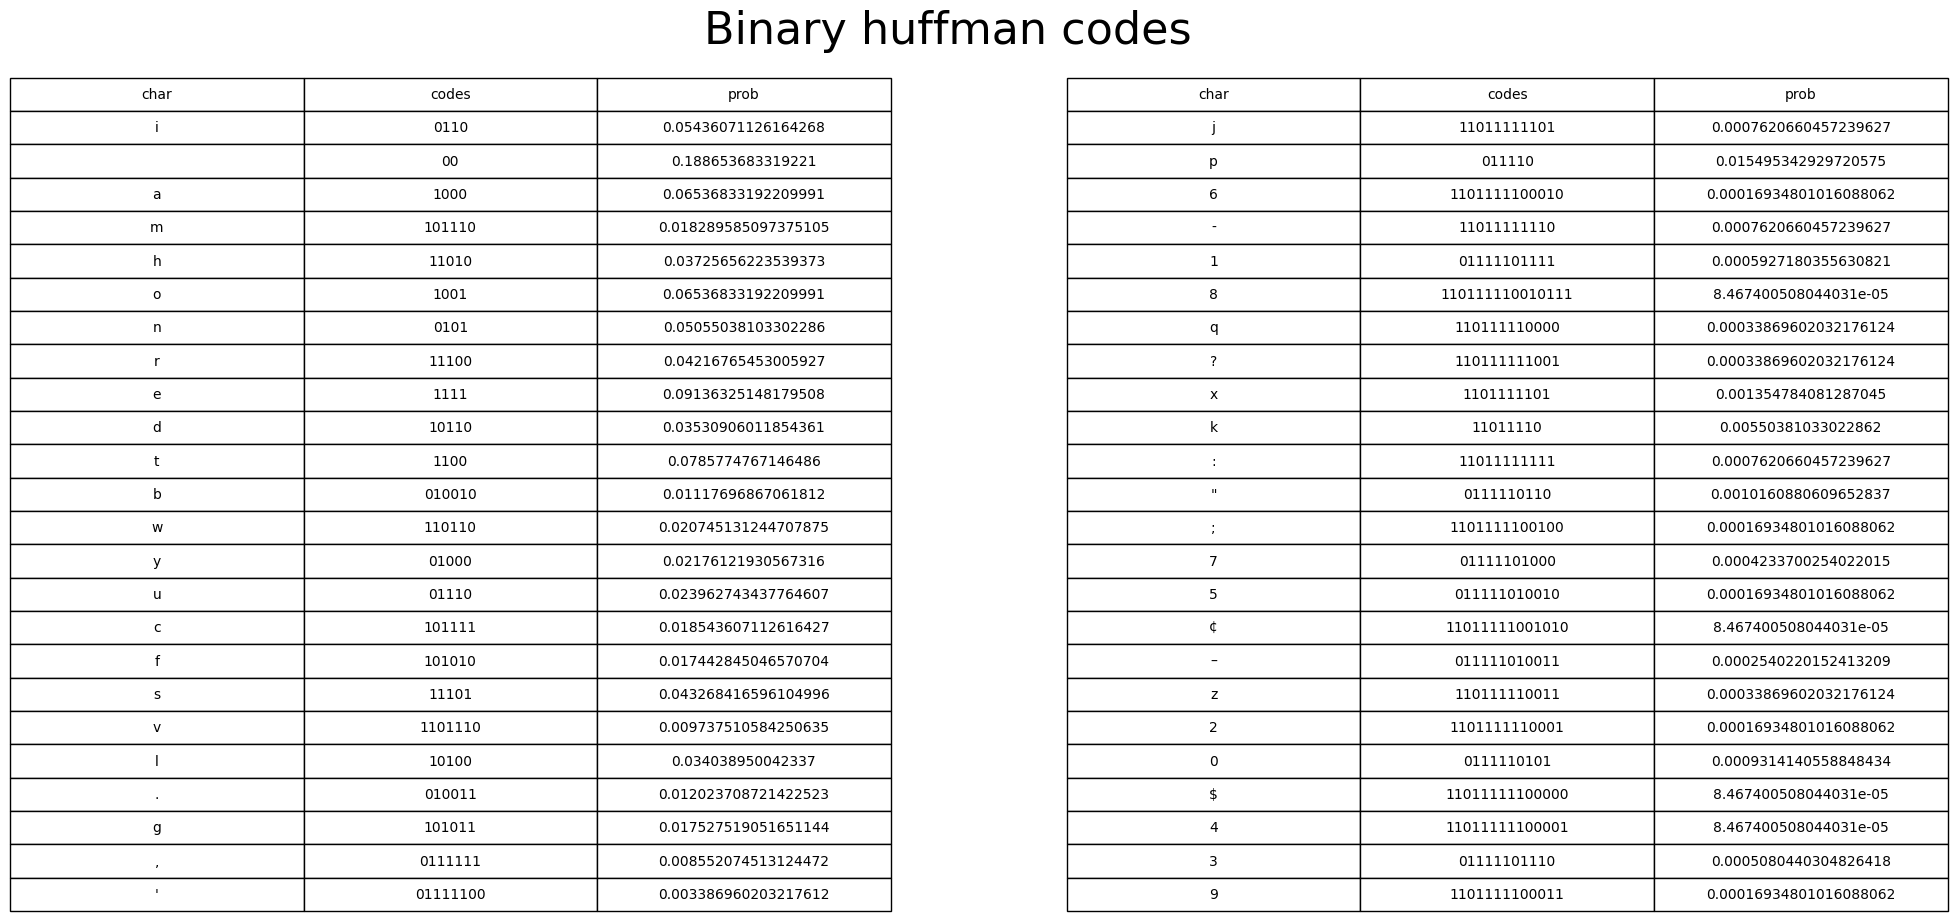

In [8]:
# plot all the codes in a table
cases1 = []
cases2 = []
cols = ['char', 'codes', 'prob']
count = 0
for i in range(r):
    if count >= r / 2:
        cases2.append([keys_data[i], dict_haff[keys_data[i]], P_data[i]])
    else:
        cases1.append([keys_data[i], dict_haff[keys_data[i]], P_data[i]])
    count += 1

fig = plt.figure(figsize=(25, 10))
fig.suptitle('Binary huffman codes', fontsize = 32) 

ax1 = fig.add_subplot(1, 2, 1)
tab = plt.table(cellText=cases1, 
                colLabels=cols, 
                loc='center', 
                cellLoc='center',
                rowLoc='center')
tab.scale(1, 2)
ax1.axis('off')

ax2 = fig.add_subplot(1, 2, 2)
tab = plt.table(cellText=cases2, 
                colLabels=cols, 
                loc='center', 
                cellLoc='center',
                rowLoc='center')
tab.scale(1, 2)
ax2.axis('off')

plt.show()

From the above code, we can have a look at the huffman code method, and apply it into a specific document, finally calculate the codes for each character while there is another famous method for coding named shannon code, which is generated by the information theory godfather Shannon, the pseudocode of the Shannon code algorithm as follow:

![](./imgs/shannon_code.png)

In [9]:
#self define a function for converting the val to binary presentation
def convert_binary(val, leng):
    each, tot = 1, 0.0
    rv = ""
    for i in range(leng):
        each = each * 0.5
        if tot + each <= val:
            tot += each
            rv += "1"
        else:
            rv += "0"
    return rv      

In [10]:
P_tuples = []
for i in range(r):
    P_tuples.append(tuple([keys_data[i], P_data[i]]))

P_tuples = sorted(P_tuples, key=lambda x: -x[1])            # use the lambda function for sort the matrix

dict_shannon = dict()

tot_F = 0.0
for i in range(r):                                          # just like what we do in the pseudocode
    prob = P_tuples[i][1]           
    length = math.ceil(math.log2(1 / prob))
    codes = convert_binary(tot_F, leng=length)          
    dict_shannon[P_tuples[i][0]] = codes
    tot_F += prob

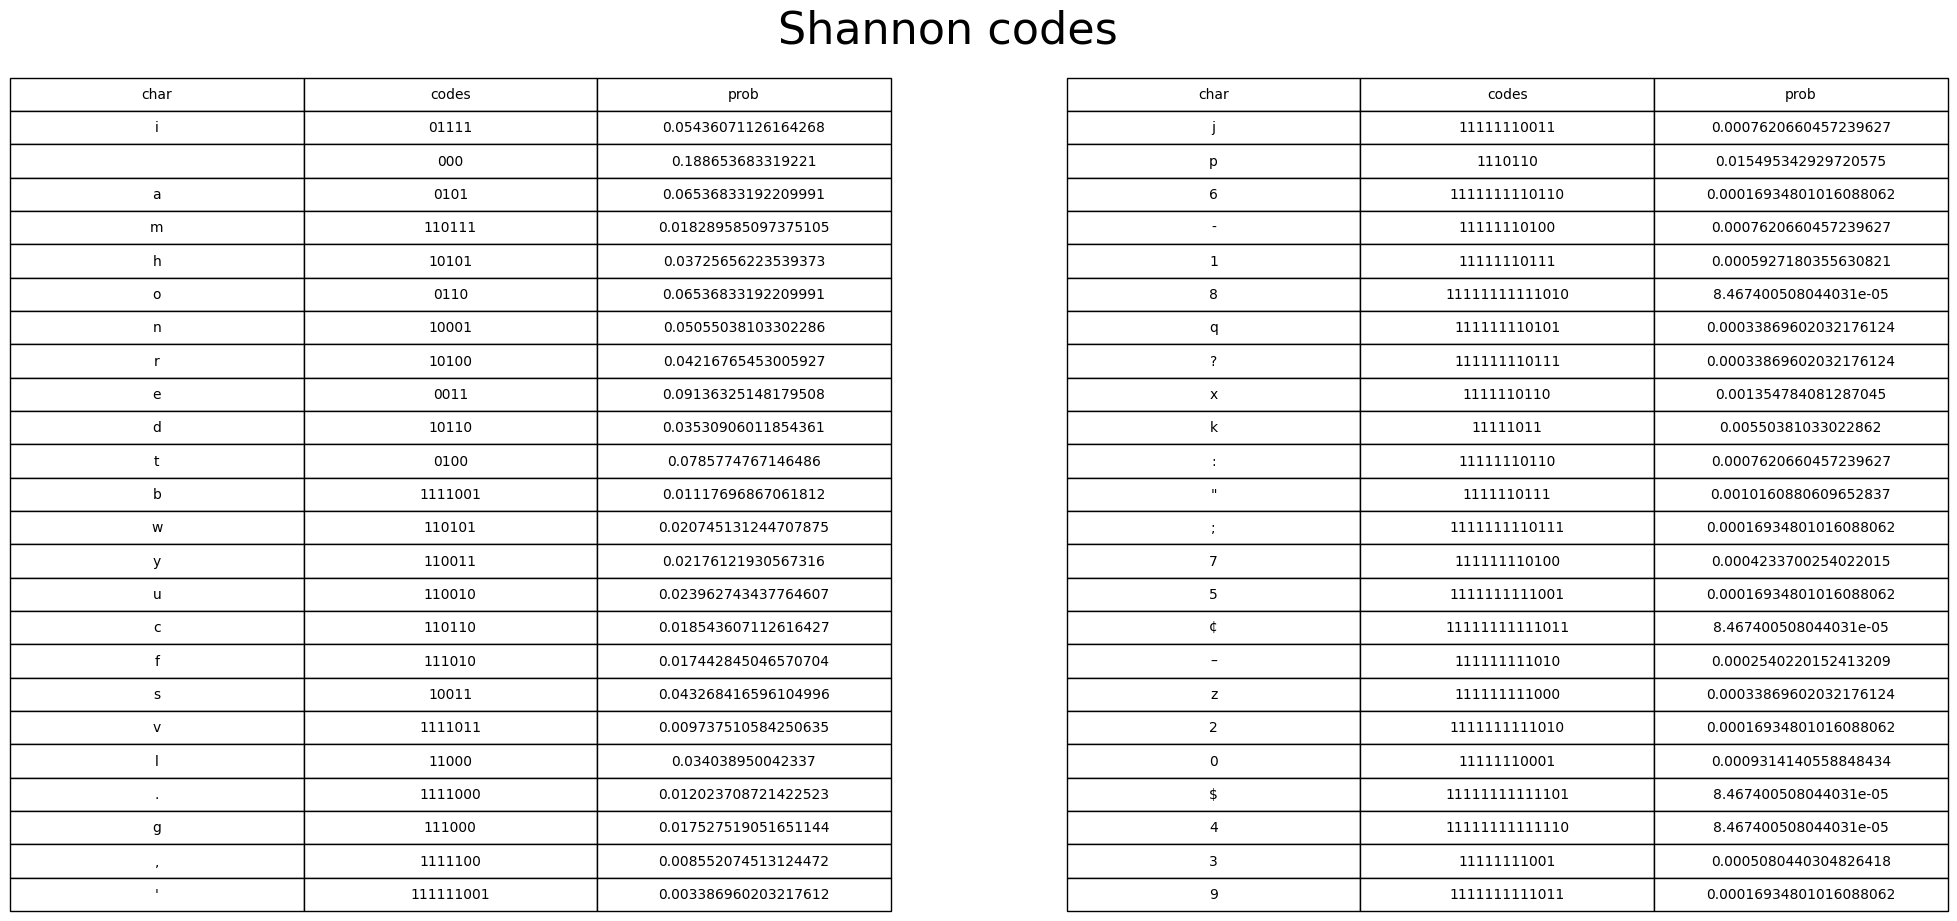

In [11]:
# plot all the codes in a table
cases1 = []
cases2 = []
cols = ['char', 'codes', 'prob']
count = 0
for i in range(r):
    if count >= r / 2:
        cases2.append([keys_data[i], dict_shannon[keys_data[i]], P_data[i]])
    else:
        cases1.append([keys_data[i], dict_shannon[keys_data[i]], P_data[i]])
    count += 1

fig = plt.figure(figsize=(25, 10))
fig.suptitle('Shannon codes', fontsize = 32) 

ax1 = fig.add_subplot(1, 2, 1)
tab = plt.table(cellText=cases1, 
                colLabels=cols, 
                loc='center', 
                cellLoc='center',
                rowLoc='center')
tab.scale(1, 2)
ax1.axis('off')

ax2 = fig.add_subplot(1, 2, 2)
tab = plt.table(cellText=cases2, 
                colLabels=cols, 
                loc='center', 
                cellLoc='center',
                rowLoc='center')
tab.scale(1, 2)
ax2.axis('off')

plt.show()

Yeah, the shannon codes has shown above in the table format, finnally we should calculate the average code length for huffman and shannon codes method respectively, and calculate their own encoding effeciency with the entropy

In [12]:
codes_huffman = 0
for i in range(r):
    codes_huffman += len(dict_haff[keys_data[i]]) * P_data[i]
print('the average code length of huffman is %.4f bits' %codes_huffman)
print('shannon code efficiency is %.4f%%' %(H_data / codes_huffman * 100))

codes_shannon = 0
for i in range(r):
    codes_shannon += len(dict_shannon[keys_data[i]]) * P_data[i]
print('the average code length of shannon is %.4f bits' %codes_shannon)
print('shannon code efficiency is %.4f%%' %(H_data / codes_shannon * 100))

the average code length of huffman is 4.2809 bits
shannon code efficiency is 99.0316%
the average code length of shannon is 4.6638 bits
shannon code efficiency is 90.9028%


From the data above, we can find that 

- the average code length of huffman is $4.2809bits$, the effeciency is $99.0316\%$
- the average code length of shannon is $4.6638bits$, the effeciency is $90.9028\%$